# Payoff call

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import binom
import math

In [3]:
import matplotlib.pyplot as plt

# Imposta le dimensioni predefinite della figura a 10 pollici per 8 pollici
plt.rcParams.update({'figure.figsize': (10, 8)})

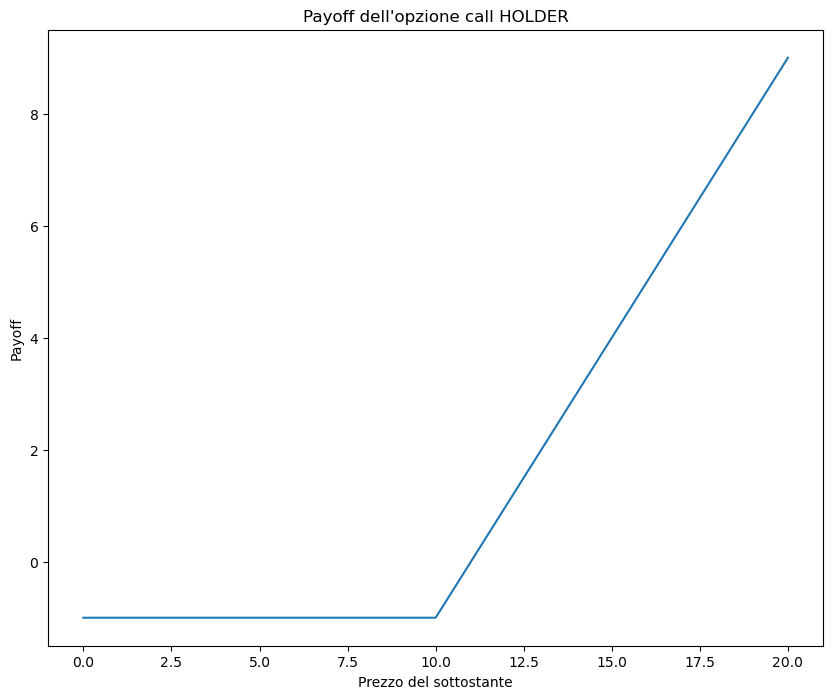

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Prezzo di acquisto dell'opzione call
S0 = 1
# Prezzo di esercizio dell'opzione call
K = 10

# Crea un array di prezzi del sottostante
S = np.linspace(0, 20, num=1000)

# Calcola il payoff dell'opzione call
payoff = np.maximum(S - K, 0)-S0

# Disegna il grafico del payoff
plt.plot(S, payoff)
plt.xlabel('Prezzo del sottostante')
plt.ylabel('Payoff')
plt.title('Payoff dell\'opzione call HOLDER')
plt.show()

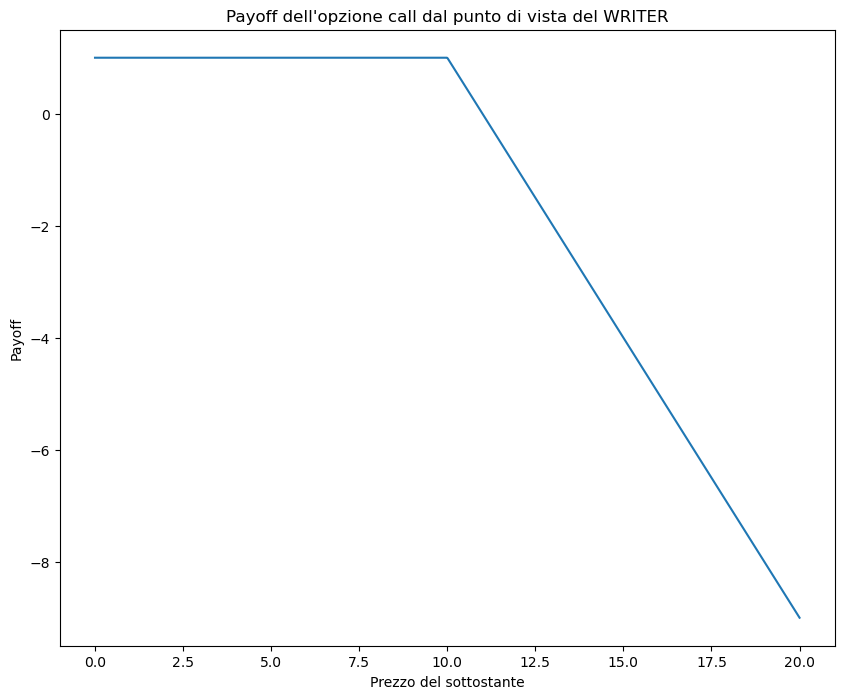

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Prezzo di esercizio dell'opzione call
K = 10

# Crea un array di prezzi del sottostante
S = np.linspace(0, 20, num=1000)

# Calcola il payoff dell'opzione call per il venditore
payoff = np.minimum(K-S, 0)+S0

# Disegna il grafico del payoff
plt.plot(S, payoff)
plt.xlabel('Prezzo del sottostante')
plt.ylabel('Payoff')
plt.title('Payoff dell\'opzione call dal punto di vista del WRITER')
plt.show()




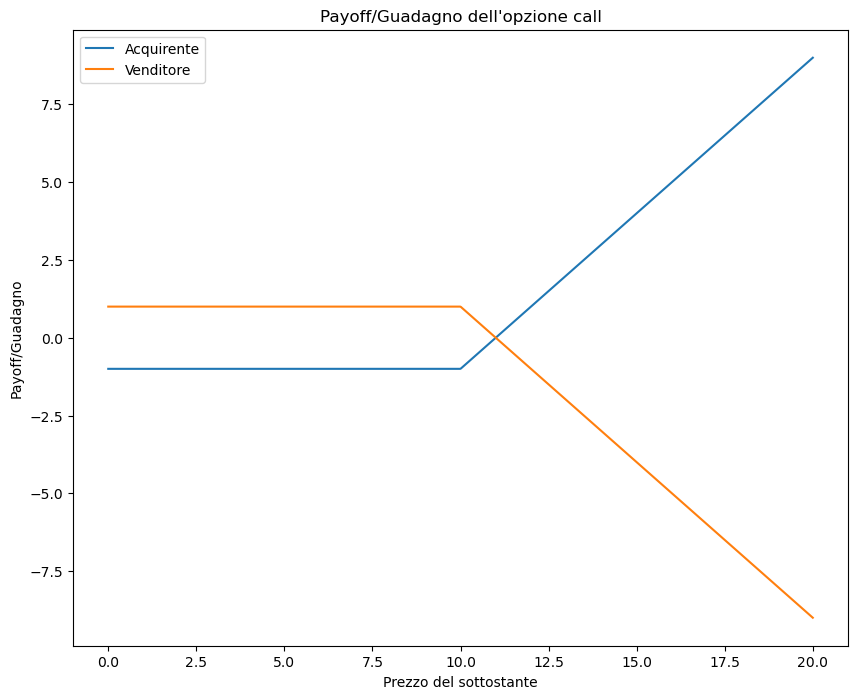

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Prezzo di esercizio dell'opzione call
K = 10
#premio dell'opzione
premio = 5

# Crea un array di prezzi del sottostante
S = np.linspace(0, 20, num=1000)

# Calcola il payoff dell'opzione call per l'acquirente
payoff_acquirente = np.maximum(S - K, 0)-S0
# Calcola il payoff dell'opzione call per il venditore
payoff_venditore = np.minimum(K-S, 0)+S0


# Disegna il grafico del payoff
plt.plot(S, payoff_acquirente, label='Acquirente')
plt.plot(S, payoff_venditore, label='Venditore')

plt.xlabel('Prezzo del sottostante')
plt.ylabel('Payoff/Guadagno')
plt.title('Payoff/Guadagno dell\'opzione call')
plt.legend()
plt.show()

# Payoff put

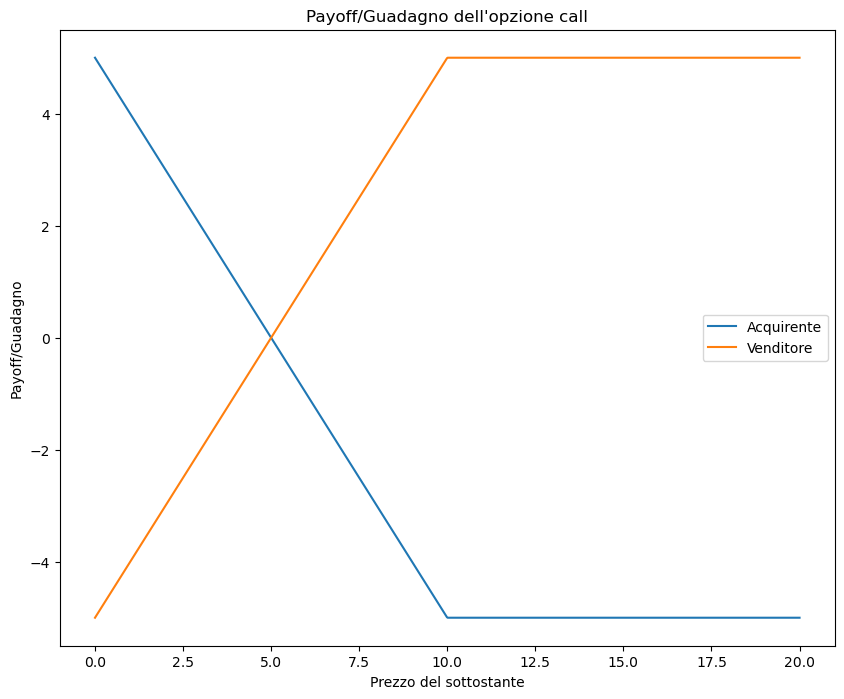

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Prezzo di esercizio dell'opzione call
K = 10
#premio dell'opzione
premio = 5

# Crea un array di prezzi del sottostante
S = np.linspace(0, 20, num=1000)

# Calcola il payoff dell'opzione call per l'acquirente
payoff_acquirente = np.maximum(K - S, 0) - premio
# Calcola il payoff dell'opzione call per il venditore
payoff_venditore = np.minimum(S - K, 0) + premio


# Disegna il grafico del payoff
plt.plot(S, payoff_acquirente, label='Acquirente')
plt.plot(S, payoff_venditore, label='Venditore')

plt.xlabel('Prezzo del sottostante')
plt.ylabel('Payoff/Guadagno')
plt.title('Payoff/Guadagno dell\'opzione call')
plt.legend()
plt.show()


# Put call parity con annesso Modello di Black-Scholes-Merton

## Modello di Black-Scholes-Merton

$$c=S_0N(d_1)-Ke^{-rT}N(d_2)$$
$$p=Ke^{-rT}N(-d_2)-S_0N(-d_1)$$

$$d_1=\frac{log\left(\frac{S_0}{K}\right)+\left(r+\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}$$
$$d_2=\frac{log\left(\frac{S_0}{K}\right)+\left(r-\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}=d_1-\sigma\sqrt{T}$$

## Modello di Put call parity

$$c+ke^{-rT}=p+s$$

In [6]:
# Esempio di utilizzo
S0 = 100  # Prezzo dell'azione sottostante
K = 120   # Prezzo di esercizio
T = 1     # Scadenza in anni
sigma = 0.2  # Volatilità
r = 0.05   # Tasso di interesse senza rischio

In [7]:
def BS(S0,K,T,sigma,r):
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - (sigma*np.sqrt(T))
    c = S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    p = K*np.exp(-r*T)*norm.cdf(-d2) - S0*norm.cdf(-d1)
    return c, p
c, p = BS(S0, K, T, sigma, r)
print(c)
print(p)


3.2474774165608125
17.3950083566465


In [8]:
# Verifica la parità put-call
if c + K / (1 + r)**T - p - S0 == 0:
    print("La parità put-call è verificata")
else:
    print("La parità put-call non è verificata")

La parità put-call non è verificata


# Modello binomiale



$$c = (1+i)^{-n}\sum_{k=0}^n\max(Su^kd^{n-k},0)\binom{n}{k}p^k(1-p)^n-k$$
dove:
$$p=\frac{e^{r\Delta t}-d}{u-d}$$
$$u=e^{\sigma\sqrt{\Delta t}}, \quad d=\frac{1}{u}$$
$$i=e^{r\Delta t}-1$$


In [14]:
import math

def binomial_call(S, K, r, sigma, T, n):
    # Calcola i valori intermedi utilizzati nelle formule
    dt = T / n
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    p = (math.exp(r * dt) - d) / (u - d)
    i = math.exp(r * dt) - 1

    # Inizializza il prezzo dell'opzione call
    call_price = 0

    # Calcola il prezzo dell'opzione call utilizzando la formula binomiale
    for k in range(n+1):
        call_price += math.pow(1 + i, -n) * math.comb(n, k) * max(S * math.pow(u, k) * math.pow(d, n-k) - K, 0) * math.pow(p, k) * math.pow(1-p, n-k)

    return call_price

# Parametri dell'opzione e dell'asset sottostante
S0 = 100   # Prezzo iniziale del sottostante
K = 100    # Prezzo di esercizio (strike price) dell'opzione call
r = 0.05   # Tasso di interesse senza rischio (risk-free rate)
sigma = 0.2   # Volatilità dell'asset sottostante
T = 1      # Scadenza dell'opzione (in anni)
n = 100    # Numero di periodi dell'albero binomiale

# Calcola il prezzo dell'opzione call utilizzando la funzione binomial_call
call_price = binomial_call(S0, K, r, sigma, T, n)

print(f"Prezzo dell'opzione call: {call_price:.2f}")


Prezzo dell'opzione call: 10.43


# Montecarlo

In [22]:
import numpy as np

def montecarlo_call(S0, K, r, sigma, T, n_simulations):
    # Calcola i parametri intermedi
    dt = T / 252  # Numero di giorni lavorativi in un anno
    n_steps = int(T / dt)

    # Genera una matrice di valori casuali dal processo Browniano geometrico
    random_matrix = np.random.randn(n_simulations, n_steps)

    # Calcola la traiettoria del prezzo dell'attività sottostante
    S_matrix = S0 * np.exp(np.cumsum((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * random_matrix, axis=1))

    # Calcola il payoff dell'opzione call
    payoff = np.maximum(S_matrix[:, -1] - K, 0)

    # Calcola il prezzo dell'opzione scontando il payoff al tempo presente
    call_price = np.mean(payoff) * np.exp(-r * T)

    return call_price

# Parametri dell'opzione e dell'asset sottostante
S0 = 100   # Prezzo iniziale del sottostante
K = 100    # Prezzo di esercizio (strike price) dell'opzione call
r = 0.05   # Tasso di interesse senza rischio (risk-free rate)
sigma = 0.2   # Volatilità dell'asset sottostante
T = 1      # Scadenza dell'opzione (in anni)
n_simulations = 10000    # Numero di simulazioni Montecarlo

# Calcola il prezzo dell'opzione call utilizzando il metodo Montecarlo
call_price = montecarlo_call(S0, K, r, sigma, T, n_simulations)

print(f"Prezzo dell'opzione call tramite Montecarlo: {call_price:.2f}")


Prezzo dell'opzione call tramite Montecarlo: 10.45
